Chúc các bạn làm bài tốt!

# Load thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abc import abstractmethod

# 1: Implement lại thuật toán Linear Regression

In [ ]:
class LinearRegression():
    def __init__(self,  pseudo_inv=True, intercept=True):
        # Để có thể làm tốt các bài sau, các bạn cần có kiến thức nền tảng về Objects Oriented Programming (OOP)
        # Mình khuyến khích bài post này:

        # Giải thích đơn giản về OOP     
        # https://www.freecodecamp.org/news/object-oriented-programming-concepts-21bb035f7260/

        # OOP trong Python         
        # https://realpython.com/python3-object-oriented-programming/
        # https://www.geeksforgeeks.org/abstract-classes-in-python/
        ...
        self.pseudo_inv = pseudo_inv
        self.intercept = intercept
        print( "Welcome")
    
    def fit(self, X, y):
        # Hàm fit sẽ là nơi chứa logic của thuật toán Linear Regression
        # Các bạn hay xoá "..." ở phía dưới đây, và implement code         
        ...

        if X.ndim == 1:
          X = X[:, None]
        if y.ndim == 1:
          y = y[:, None]
        if self.intercept:
          X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        if self.pseudo_inv:
          self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
        else:
          self.w = np.lianlg.inv(X.T @ X) @ X.T @ y
        
    def predict(self, X):
        # Như tên của hàm, đây là nơi để các bạn dự đoán dữ liệu
        # Như hướng dẫn phía trên, hãy xoá "..." ở phía dưới đây,
        # và implement code dự đoán.          
        ...
        if X.ndim == 1:
          X = X[:, None]
        if self.intercept:
          X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        y_pred = X @ self.w 
        return y_pred


# 2a: Fit dữ liệu trong file linear.csv và visualize

In [ ]:
regressor = LinearRegression()
# Code trong cell này.

Welcome


# 2b: Tính loss Root Mean Squared Error - RMSE

In [ ]:
# Code trong cell này.
rmse = lambda y, y_pred: np.mean((y.ravel() - y_pred.ravel()).T @ (y.ravel() - y_pred.ravel())).item() ** (1/2)

# 3a: Fit dữ liệu trong file nonLinear.csv 

In [ ]:
# Code trong cell này.
data = pd.read_csv("nonLinear.csv")

In [ ]:
data.head()

Diện tích  Giá nhà
0    30.0000 -100.000
1    32.4138 -190.725
2    34.8276 -269.798
3    37.2414 -337.218
4    39.6552 -392.985

In [ ]:
display(data.info())
print(data.shape)
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diện tích  30 non-null     float64
 1   Giá nhà    30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


None

(30, 2)


Diện tích      Giá nhà
count   30.000000    30.000000
mean    65.000000   161.494537
std     21.249598   750.695486
min     30.000000  -499.524000
25%     47.500025  -412.961250
50%     65.000000  -171.997500
75%     82.499975   557.342250
max    100.000000  2000.000000

In [ ]:
X = data.iloc[:, 0]
y = data.iloc[:, 1]
regressor.fit(X, y)
y_pred = regressor.predict(X)

(30, 2)
(30, 2)


/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/192086071.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, None]
/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/192086071.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, None]
/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/192086071.py:39: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, None]


# 3b: Visualize kết quả

In [ ]:
rmse(data.iloc[:, 1].values, y_pred)

2134.8075878596946

In [ ]:
str(np.round(rmse(data.iloc[:, 1].values, y_pred), 2))

'2134.81'

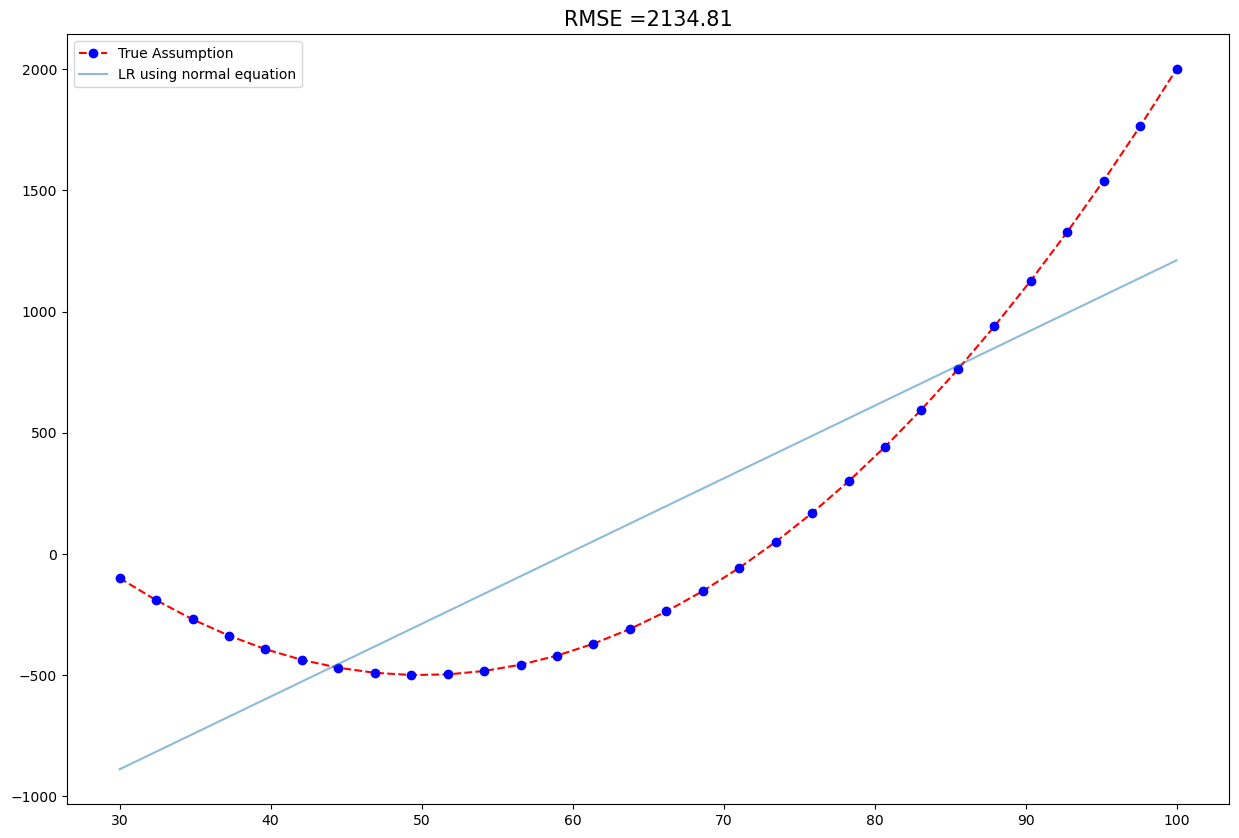

In [ ]:
# Code trong cell này.
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(data.iloc[:, 0], data.iloc[:, 1], marker="o", linestyle="--", markerfacecolor="blue",markeredgecolor="blue", color="r", label="True Assumption")
ax.plot(data.iloc[:, 0], y_pred, alpha=0.5, label="LR using normal equation")
ax.set_title("RMSE ="+str(np.round(rmse(data.iloc[:, 1].values, y_pred), 2)), fontsize=15)
ax.legend();

# 3c: Nhận xét

The true relationship between independent and dependent varaibles is non-linear, seemingly represented by a 2-degree polynomial function.

Đây là cell markdown, hãy ghi nhận xét của bạn ở đây

# 4: Cải thiện model

In [ ]:
# Code trong cell này.
def naive_poly(X, degree=2):
    if X.ndim == 1:
        X = X[:, None]
    X_columns_shape = X.shape[1]
    X_out_columns_shape =X_columns_shape * degree
    X_out = np.zeros((X.shape[0], X_out_columns_shape))
    for i in range(0, degree):
        X_out[:, i*X_columns_shape:(i+1)*X_columns_shape] = X ** (i + 1) 
    print("Return X's shape:", X_out.shape)
    return X_out

Return X's shape: (30, 2)
Welcome


/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/833377174.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, None]
/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/3996861437.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, None]


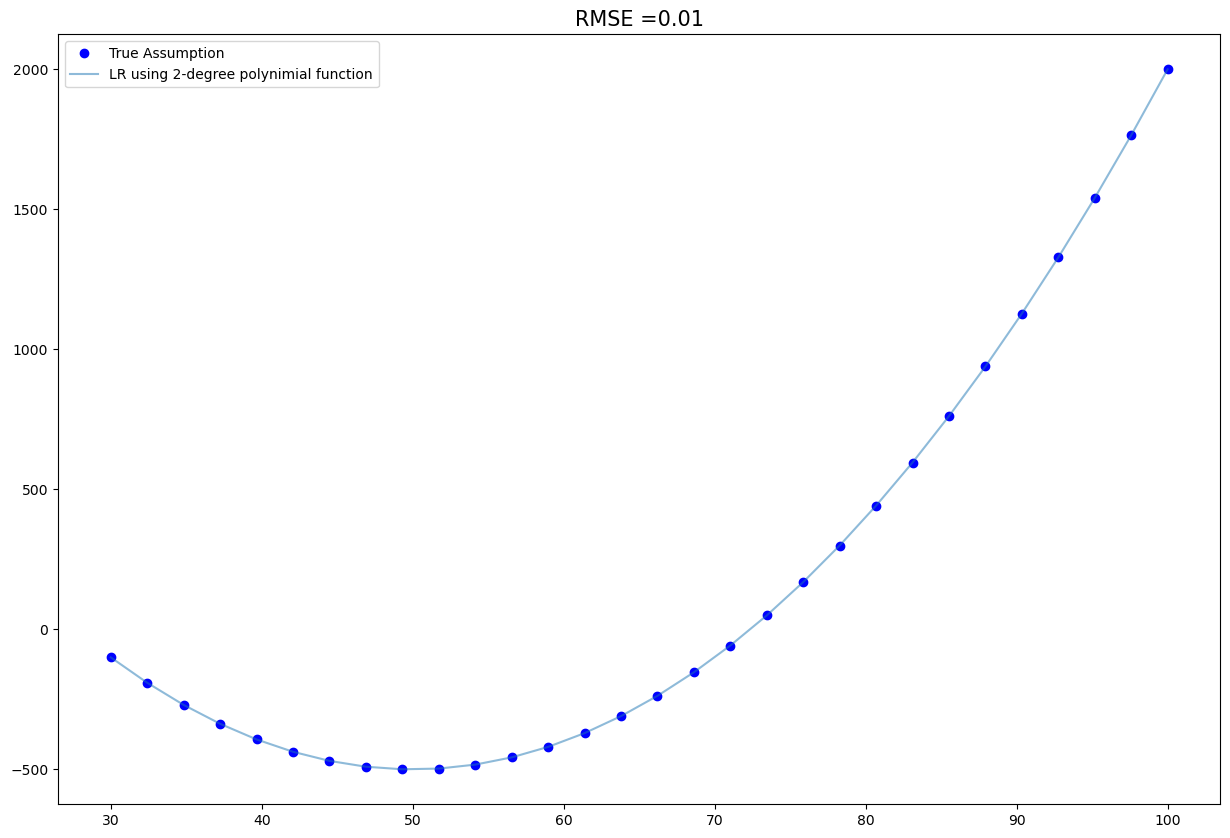

In [ ]:
X_poly = naive_poly(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)
y_pred_poly = regressor.predict(X_poly)
# Code trong cell này.
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(data.iloc[:, 0], data.iloc[:, 1], marker="o", markerfacecolor="blue",markeredgecolor="blue", color="r", linestyle="", label="True Assumption")
ax.plot(data.iloc[:, 0], y_pred_poly, alpha=0.5, label="LR using 2-degree polynimial function")
ax.set_title("RMSE ="+str(np.round(rmse(data.iloc[:, 1].values, y_pred_poly), 2)), fontsize=15)
ax.legend();

# 5: Thử nghiệm với dữ liệu sample.csv

In [ ]:
data = pd.read_csv("sample.csv", index_col=0)

In [ ]:
display(data.info())
print(data.shape)
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   %Fat          92 non-null     float64
 1   Femoral Neck  92 non-null     float64
 2   Kg            92 non-null     float64
 3   Activity      92 non-null     float64
 4   %Fat S        92 non-null     float64
 5   pound         92 non-null     float64
dtypes: float64(6)
memory usage: 5.0 KB


None

(92, 6)


%Fat  Femoral Neck         Kg     Activity        %Fat S  \
count  92.000000     92.000000  92.000000    92.000000  9.200000e+01   
mean   28.565217      0.803120  53.928192  2561.989565  7.723291e-17   
std     6.989229      0.104216  15.100364  1042.466601  6.989229e+00   
min    16.800000      0.558000  33.565838   824.250000 -1.176522e+01   
25%    23.150000      0.736500  43.885065  1816.932500 -5.415217e+00   
50%    27.350000      0.791000  49.498271  2430.260000 -1.215217e+00   
75%    33.075000      0.853750  58.910313  3003.507500  4.509783e+00   
max    46.800000      1.081000  98.429551  7191.080000  1.823478e+01   

            pound  
count   92.000000  
mean   119.840427  
std     33.556364  
min     74.590750  
25%     97.522366  
50%    109.996157  
75%    130.911807  
max    218.732335

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_poly.shape

(92, 5)

In [ ]:
rmse(y, y_pred_poly)

2.4595043733586617e-10

In [ ]:
X_poly = naive_poly(X, degree=)
regressor = LinearRegression()
regressor.fit(X_poly, y)
y_pred_poly = regressor.predict(X_poly)
print("Degree %d: RMSE = %.2f"%(degree, rmse(y, y_pred_poly)), end="\n=====\n")

Return X's shape: (92, 10)
Welcome
Degree 26: RMSE = 0.08
=====


/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/3996861437.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, None]


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
for degree in range(1, 10, 1):
    X_poly = naive_poly(X, degree=degree)
    regressor = LinearRegression()
    regressor.fit(X_poly, y)
    y_pred_poly = regressor.predict(X_poly)
    print("Degree %d: RMSE = %.2f"%(degree, rmse(y, y_pred_poly)), end="\n=====\n")


Return X's shape: (92, 5)
Welcome
Degree 1: RMSE = 0.00
=====
Return X's shape: (92, 10)
Welcome
Degree 2: RMSE = 0.08
=====
Return X's shape: (92, 15)
Welcome
Degree 3: RMSE = 269.69
=====
Return X's shape: (92, 20)
Welcome
Degree 4: RMSE = 503.26
=====
Return X's shape: (92, 25)
Welcome
Degree 5: RMSE = 965.14
=====
Return X's shape: (92, 30)
Welcome
Degree 6: RMSE = 1054.38
=====
Return X's shape: (92, 35)
Welcome
Degree 7: RMSE = 1105.16
=====
Return X's shape: (92, 40)
Welcome
Degree 8: RMSE = 1132.93
=====
Return X's shape: (92, 45)
Welcome
Degree 9: RMSE = 1148.25
=====


/var/folders/jy/qwmj9snn77n08n9t88jq09480000gn/T/ipykernel_7907/3996861437.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, None]
